# Task - Predict the diamond price


import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

loading the dataset


In [2]:
df=pd.read_csv("diamonds.csv")

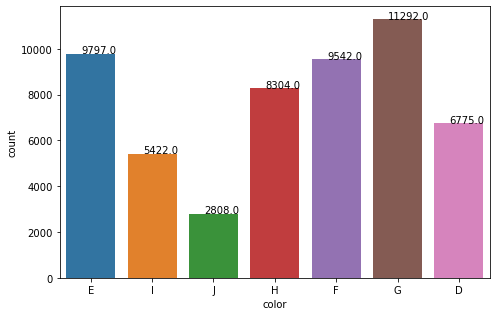

In [7]:

ax = sn.countplot(x="color", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

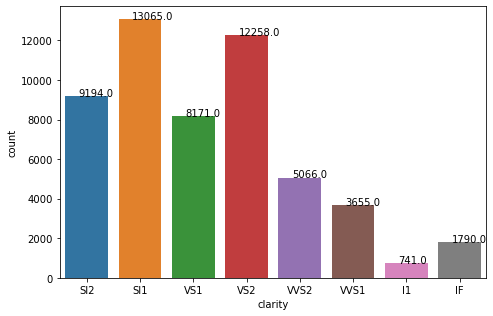

In [8]:

ax = sn.countplot(x="clarity", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

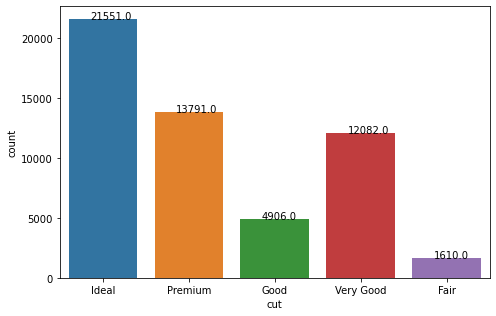

In [6]:

ax = sn.countplot(x="cut", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<AxesSubplot:xlabel='depth', ylabel='Count'>

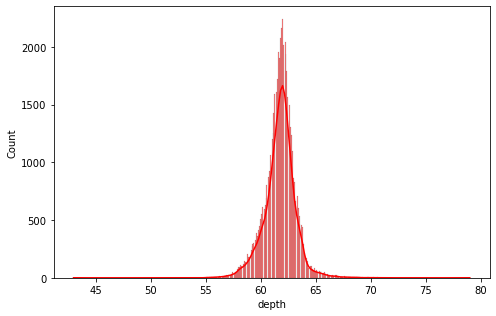

In [18]:
sn.histplot(data = df, x = "depth", kde = True,color="red",)

<AxesSubplot:xlabel='depth'>

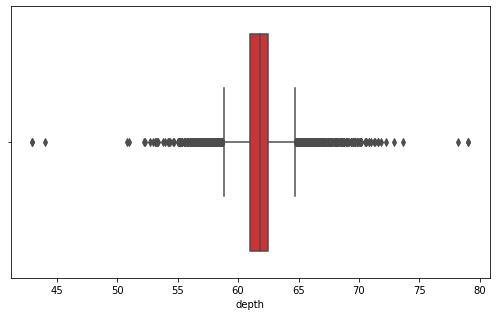

In [17]:
sn.boxplot(x="depth",
                data=df, palette="Set1",
                dodge=True)

In [16]:
df["depth"].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

Step - 2: Perform the EDA on the given dataset

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

we did not have any null value in our dataset

<AxesSubplot:xlabel='x'>

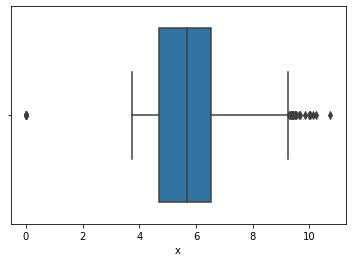

In [16]:
sn.boxplot(x="x",data=df)

<AxesSubplot:xlabel='y'>

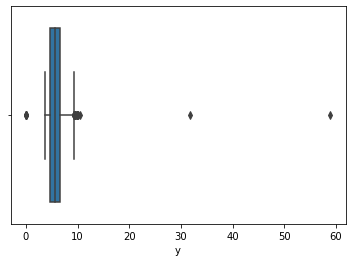

In [17]:
sn.boxplot(x="y",data=df)

<AxesSubplot:xlabel='z'>

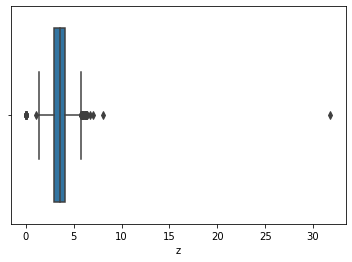

In [18]:
sn.boxplot(x="z",data=df)

In x,y,z features ther are some outliers and also some data points are at zero so we have to remove them 

In [19]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)

In [20]:
df.shape

(53920, 10)

In [21]:
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

<AxesSubplot:xlabel='z'>

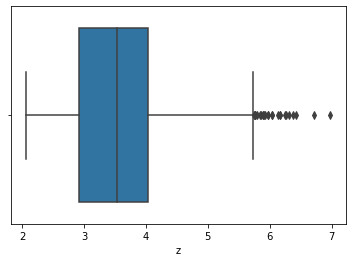

In [22]:
sn.boxplot(x="z",data=df)

we have remove all the outliers from x y z columns

<AxesSubplot:xlabel='cut', ylabel='price'>

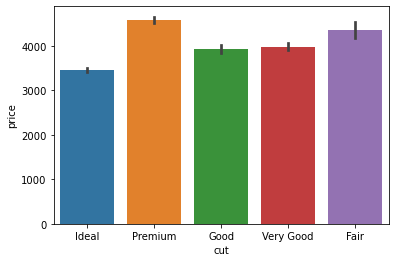

In [23]:
sn.barplot(x="cut",y="price",data=df)

It is clear that premium cut diamond is most expensive and ideal cut is most cheaper in price

<AxesSubplot:xlabel='color', ylabel='price'>

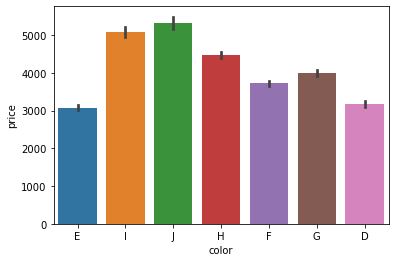

In [24]:
sn.barplot(x="color",y="price",data=df)

It is clear that j color diamond is very expensive compared to E color

<AxesSubplot:xlabel='clarity', ylabel='price'>

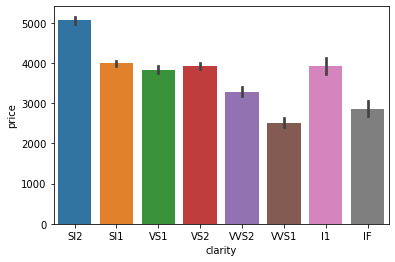

In [25]:
sn.barplot(x="clarity",y="price",data=df)

We can sea s12 clarity diamond are most expensive

<AxesSubplot:xlabel='table', ylabel='Count'>

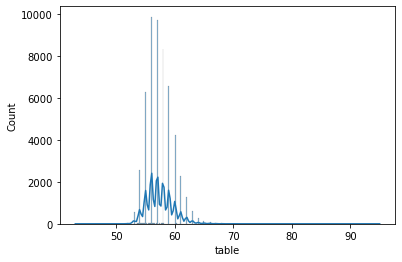

In [26]:
sn.histplot(x="table",data=df,kde=True)

<AxesSubplot:xlabel='table'>

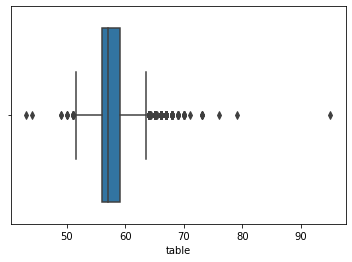

In [27]:
sn.boxplot(x="table",data=df)

In [26]:
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
print("First quantile:",q1,"Second quatile:",q3)
iqr=q3-q1
print("IQR:",iqr)
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Upper limit:",upper_limit,"lower limit:",lower_limit)
df = df[(df["table"]<63.5)&(df["table"]>51.5)]

First quantile: 56.0 Second quatile: 59.0
IQR: 3.0
Upper limit: 63.5 lower limit: 51.5


In [29]:
iqr=q3-q1
iqr

3.0

In [30]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print(upper_limit,lower_limit)


63.5 51.5


In [31]:
df = df[(df["table"]<63.5)&(df["table"]>51.5)]

In [32]:
df.shape

(53309, 10)

<AxesSubplot:xlabel='table'>

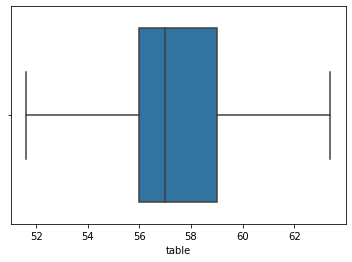

In [33]:
sn.boxplot(x="table",data=df)

we remove outliers from table coulms also

<AxesSubplot:xlabel='depth'>

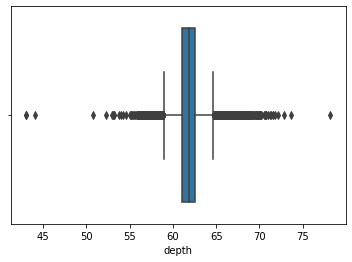

In [34]:
sn.boxplot(x="depth",data=df)

In [35]:
q1_d = df['depth'].quantile(0.25)
q3_d = df['depth'].quantile(0.75)
print(q1_d,q3_d)
iqr_d=q3_d-q1_d
upper = q3_d+ 1.5 * iqr_d
lower = q1_d - 1.5 * iqr_d
print(upper,lower)

61.1 62.5
64.6 59.0


In [36]:
df = df[(df["depth"]<64.6)&(df["depth"]>59)]

<AxesSubplot:xlabel='depth'>

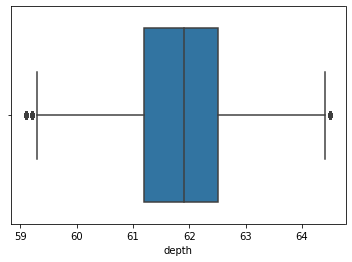

In [37]:
sn.boxplot(x="depth",data=df)

<AxesSubplot:xlabel='carat'>

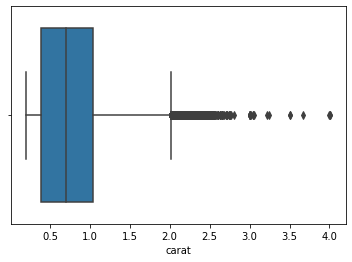

In [38]:
sn.boxplot(x="carat",data=df)

Step - 3: Handle Categorical Columns

In [39]:
from sklearn import preprocessing

In [40]:
label_encoder = preprocessing.LabelEncoder()
df['color']= label_encoder.fit_transform(df['color'])
df['cut']= label_encoder.fit_transform(df['cut'])
df['clarity']= label_encoder.fit_transform(df['clarity'])
  

In [27]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


<AxesSubplot:>

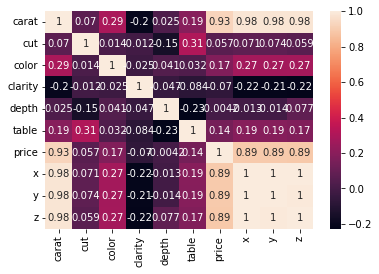

In [42]:
correrlation= df.corr()
sn.heatmap(correrlation,annot=True)

we can see that price has maximum correlation with carat,x,y,z and the leat correlation is with clarity,depta

Step - 5: Split the data - Test and Train

In [43]:
x=df[['carat','cut','color','clarity','depth','table','x', 'y','z']]

In [44]:
y=df['price']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
3447,1.01,2,1,0,62.0,57.0,6.37,6.41,3.96
1576,0.71,2,3,2,61.3,55.0,5.73,5.79,3.53
31714,0.35,2,1,4,61.6,55.1,4.54,4.58,2.81
50292,0.31,2,3,4,62.7,57.0,4.31,4.34,2.71
17490,1.00,1,0,5,60.7,61.0,6.40,6.46,3.90


Separating Categorical and Numerical Columns


In [47]:
X_train.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [48]:
X_train_categorical = X_train.select_dtypes(include=['int32'])
X_train_categorical.head()

,cut,color,clarity
3447,2,1,0
1576,2,3,2
31714,2,1,4
50292,2,3,4
17490,1,0,5


In [49]:
X_train_numerical = X_train.select_dtypes(include=[ 'float64'])
X_train_numerical.head()

,carat,depth,table,x,y,z
3447,1.01,62.0,57.0,6.37,6.41,3.96
1576,0.71,61.3,55.0,5.73,5.79,3.53
31714,0.35,61.6,55.1,4.54,4.58,2.81
50292,0.31,62.7,57.0,4.31,4.34,2.71
17490,1.00,60.7,61.0,6.40,6.46,3.90


Standardizing the data

In [50]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_numerical_rescaled = pd.DataFrame(scaler.fit_transform(X_train_numerical), 
                                    columns = X_train_numerical.columns, 
                                    index = X_train_numerical.index)
X_train_numerical_rescaled.head()

,carat,depth,table,x,y,z
3447,0.478539,0.184742,-0.137832,0.600947,0.636995,0.633011
1576,-0.161064,-0.469138,-1.130646,0.027818,0.078317,0.009722
31714,-0.928589,-0.188904,-1.081005,-1.037843,-1.012008,-1.033925
50292,-1.013869,0.838621,-0.137832,-1.243811,-1.228271,-1.178876
17490,0.457219,-1.029605,1.847796,0.627812,0.682050,0.546041


In [51]:
X_train_transformed = pd.concat([X_train_numerical_rescaled, X_train_categorical], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
3447,0.478539,0.184742,-0.137832,0.600947,0.636995,0.633011,2,1,0
1576,-0.161064,-0.469138,-1.130646,0.027818,0.078317,0.009722,2,3,2
31714,-0.928589,-0.188904,-1.081005,-1.037843,-1.012008,-1.033925,2,1,4
50292,-1.013869,0.838621,-0.137832,-1.243811,-1.228271,-1.178876,2,3,4
17490,0.457219,-1.029605,1.847796,0.627812,0.682050,0.546041,1,0,5


Preparing Test Data

In [52]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52873,0.54,2,2,7,60.7,56.0,5.27,5.30,3.21
9093,1.20,3,3,3,61.8,60.0,6.85,6.78,4.21
43393,0.50,2,5,5,61.9,56.0,5.08,5.13,3.16
28482,0.32,4,1,2,63.3,55.0,4.36,4.33,2.75
16783,1.24,3,4,2,60.2,60.0,6.91,6.94,4.17


In [53]:
X_test_categorical = X_test.select_dtypes(include=['int32'])
X_test_categorical.head()

,cut,color,clarity
52873,2,2,7
9093,3,3,3
43393,2,5,5
28482,4,1,2
16783,3,4,2


In [54]:
X_test_numerical = X_test.select_dtypes(include=[ 'float64'])
X_test_numerical.head()

,carat,depth,table,x,y,z
52873,0.54,60.7,56.0,5.27,5.30,3.21
9093,1.20,61.8,60.0,6.85,6.78,4.21
43393,0.50,61.9,56.0,5.08,5.13,3.16
28482,0.32,63.3,55.0,4.36,4.33,2.75
16783,1.24,60.2,60.0,6.91,6.94,4.17


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_test_numerical_rescaled = pd.DataFrame(scaler.fit_transform(X_test_numerical), 
                                    columns = X_test_numerical.columns, 
                                    index = X_test_numerical.index)
X_test_numerical_rescaled.head()

,carat,depth,table,x,y,z
52873,-0.520391,-1.054614,-0.628135,-0.380449,-0.359157,-0.451211
9093,0.897598,-0.006527,1.368394,1.041491,0.981209,1.006617
43393,-0.606330,0.088754,-0.628135,-0.551442,-0.513118,-0.524102
28482,-0.993055,1.422683,-1.127267,-1.199415,-1.237640,-1.121812
16783,0.983537,-1.531018,1.368394,1.095489,1.126113,0.948304


In [56]:
X_test_transformed = pd.concat([X_test_numerical_rescaled, X_test_categorical], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52873,-0.520391,-1.054614,-0.628135,-0.380449,-0.359157,-0.451211,2,2,7
9093,0.897598,-0.006527,1.368394,1.041491,0.981209,1.006617,3,3,3
43393,-0.606330,0.088754,-0.628135,-0.551442,-0.513118,-0.524102,2,5,5
28482,-0.993055,1.422683,-1.127267,-1.199415,-1.237640,-1.121812,4,1,2
16783,0.983537,-1.531018,1.368394,1.095489,1.126113,0.948304,3,4,2


Building machine learning model

knn model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_transformed, y_train)



KNeighborsClassifier(n_neighbors=3)

In [58]:
y_test_pred = knn.predict(X_test_transformed)

accuracy of model

In [59]:
diffe = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

diffe.head()

,Actual,Predicted
52873,2582,2160
9093,4524,4320
43393,1410,1073
28482,672,698
16783,6686,4746


In [60]:
from sklearn import metrics

In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  569.5161906277349
Mean Squared Error:  1218362.2475137243
Root Mean Squared Error:  1103.7944770262825


Linear regression model

In [62]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()

In [63]:
linear_model.fit(X_train_transformed,y_train)

LinearRegression()

In [64]:
y_pred =(linear_model.predict(X_test_transformed))


In [65]:
difference = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
difference.head()

,Actual,Predicted
52873,2582,2906.111070
9093,4524,6481.359284
43393,1410,1227.626138
28482,672,228.295175
16783,6686,6836.780789


In [66]:
linear_model.coef_

array([ 5657.75352722,   103.86860046,  -150.16163331, -2354.30619695,
        3633.30338802, -3022.93438414,   -14.62938722,  -278.38707823,
         269.6961095 ])

In [67]:
cofficent=pd.DataFrame(linear_model.coef_,x.columns,columns=['Coeff'])
cofficent

,Coeff
carat,5657.753527
cut,103.868600
color,-150.161633
clarity,-2354.306197
depth,3633.303388
table,-3022.934384
x,-14.629387
y,-278.387078
z,269.696109


accuracy of model

In [68]:
print(linear_model.score(X_test_transformed, y_test))

0.8942133216963974


In [69]:
from sklearn import metrics

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  834.1648622391126
Mean Squared Error:  1666168.0612191013
Root Mean Squared Error:  1290.8013252313856


Random forest model

In [71]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()
RF.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [72]:
y_predictions =(RF.predict(X_test_transformed))

In [73]:
r2=metrics.explained_variance_score(y_test,y_predictions)
r2

0.981576004427597

In [74]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})

diff.head()

,Actual,Predicted
52873,2582,2269.65
9093,4524,5239.54
43393,1410,1210.56
28482,672,673.03
16783,6686,6560.85


In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predictions))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predictions))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error:  267.0985576986463
Mean Squared Error:  290377.073887679
Root Mean Squared Error:  538.8664712966274


Decision tree

In [76]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [77]:
y_test_pred = dt_regressor.predict(X_test_transformed)

In [78]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52873,2582,2216.0
9093,4524,6969.0
43393,1410,1301.0
28482,672,672.0
16783,6686,6808.0


In [79]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  353.2578964118068
Mean Squared Error:  523957.12552709045
Root Mean Squared Error:  723.8488278135777


Serialization

In [80]:
from pickle import dump

dump(scaler, open(r'C:\Users\Dell\del\models\standard_scaler.pkl', 'wb'))
dump(knn, open(r'C:\Users\Dell\del\models\knnregression.pkl', 'wb'))
dump(linear_model, open(r'C:\Users\Dell\del\models\linearregression.pkl', 'wb'))
dump(RF, open(r'C:\Users\Dell\del\models\randomforestregression.pkl', 'wb'))


Deserialization

In [81]:
from pickle import load

In [82]:
RF = load(open(r'C:\Users\Dell\del\models\randomforestregression.pkl', 'rb'))
scaler = load(open(r'C:\Users\Dell\del\models\standard_scaler.pkl', 'rb'))

In [83]:
print("Enter Diamond Details")

carat = float(input('Carat: '))
cut = input('Cut: ')
color = input('Color: ')
clarity = input('Clarity: ')
length = float(input('Length: '))
width = float(input('Width: '))
depth = float(input('Depth: '))

Enter Diamond Details
Carat: 


ValueError: could not convert string to float: ''

In [84]:
label_cut = {'Ideal':2, 'Premium':3, 'Very Good':4, 'Good':1, 'Fair':0}
label_color = {'G':3, 'E':1, 'F':2, 'H':4, 'D':0, 'I':5, 'J':6}
label_clarity = {'SI1':2, 'VS2':5, 'SI2':3, 'VS1': 4, 'VVS2':7, 'VVS1':6, 'IF':1, 'I1':0}

In [85]:
label_clarity.keys()

dict_keys(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])

In [86]:
label_color

{'G': 3, 'E': 1, 'F': 2, 'H': 4, 'D': 0, 'I': 5, 'J': 6}

In [87]:
num_scal=scaler.transform([[1.16 ,61.5 ,55.0 ,6.75 ,6.81 ,4.17]])
num_scal.flatten()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 0.8116594 , -0.29236893, -1.12726666,  0.95149496,  1.00837828,
        0.94830385])

In [88]:
cat_encod=np.array([label_clarity["I1"],label_color["J"],label_cut["Good"]])
cat_encod


array([0, 6, 1])

In [89]:
np.concatenate((cat_encod, num_scal.flatten()), axis=None).reshape(1,-1)

array([[ 0.        ,  6.        ,  1.        ,  0.8116594 , -0.29236893,
        -1.12726666,  0.95149496,  1.00837828,  0.94830385]])

In [90]:
RF.predict(np.concatenate((cat_encod, num_scal.flatten()), axis=None).reshape(1,-1)).item()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


3589.69

In [3]:
import mlflow

In [121]:
pip install mlflow

  Using cached mlflow-1.29.0-py3-none-any.whl (16.9 MB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached docker-6.0.0-py3-none-any.whl (147 kB)
  Using cached databricks-cli-0.17.3.tar.gz (77 kB)
  Using cached prometheus_flask_exporter-0.20.3-py3-none-any.whl (18 kB)
  Using cached Mako-1.2.3-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyjwt>=1.7.0 in c:\users\dell\anaconda3\lib\site-packages (from databricks-cli<1,>=0.8.7->mlflow) (2.1.0)
  Using cached oauthlib-3.2.1-py3-none-any.whl (151 kB)

  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Created wheel for databricks-cli: filename=databricks_cl

In [4]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', creation_time=1664345636185, experiment_id='1', last_update_time=1664345636185, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

Experiment 1 - Training KNN Regressor


In [91]:
with mlflow.start_run():
    mlflow.set_tag("developer","AJAYKHATRI")
    mlflow.set_tag("Algorithm","KNN")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path","data/diamonds.csv")
    k=3
    mlflow.log_param("n_neighbors",k)
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_transformed, y_train)
    y_test_pred = knn_regressor.predict(X_test_transformed)
    MAE=metrics.mean_absolute_error(y_test, y_test_pred)
    MSE=metrics.mean_squared_error(y_test, y_test_pred)
    RMSQ=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.log_metric("Mean Squared Error",MSE)
    mlflow.log_metric("Root Mean Squared Error",RMSQ)
    mlflow.sklearn.log_model(knn,artifact_path="models")
    mlflow.log_artifact("models\standard_scaler.pkl")

C:\Users\Dell\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Experiment 2 - Training Decision Tree Regression

In [92]:
from pprint import pprint
pprint(dt_regressor.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [93]:
with mlflow.start_run():
    mlflow.set_tag("developer","AJAYKHATRI")
    mlflow.set_tag("Algorithm","DT")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path","data/diamonds.csv")
    d=5
    f='auto'
    l=50
    mlflow.log_param("max_depth",k)
    mlflow.log_param("max_features",f)
    mlflow.log_param("max_leaf_nodes",l)
    dt_regressor =DecisionTreeRegressor(max_depth=k,max_features=f,max_leaf_nodes=l)#,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')
    dt_regressor.fit(X_train_transformed, y_train)
    y_test_pred = dt_regressor.predict(X_test_transformed)
    MAE=metrics.mean_absolute_error(y_test, y_test_pred)
    MSE=metrics.mean_squared_error(y_test, y_test_pred)
    RMSQ=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.log_metric("Mean Squared Error",MSE)
    mlflow.log_metric("Root Mean Squared Error",RMSQ)
    mlflow.sklearn.log_model(dt_regressor,artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

Experiment 3 - Training Random Forest Regression

In [103]:
with mlflow.start_run():
    mlflow.set_tag("developer","AJAYKHATR")
    mlflow.set_tag("Algorithm","RF")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path","data/diamonds.csv")
    d=5
    f='auto'
    l=50
    n=100
    mlflow.log_param("max_depth",k)
    mlflow.log_param("max_features",f)
    mlflow.log_param("max_leaf_nodes",l)
    mlflow.log_param("n_estimators",n)
    rf_regressor =RandomForestRegressor(max_depth=k,max_features=f,max_leaf_nodes=l,n_estimators=n)
    rf_regressor.fit(X_train_transformed, y_train)
    y_test_pred = rf_regressor.predict(X_test_transformed)
    MAE=metrics.mean_absolute_error(y_test, y_test_pred)
    MSE=metrics.mean_squared_error(y_test, y_test_pred)
    RMSQ=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.log_metric("Mean Squared Error",MSE)
    mlflow.log_metric("Root Mean Squared Error",RMSQ)
    mlflow.sklearn.log_model(dt_regressor,artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")


Experiment 4- Training KNN Regressor with Hyperparameter Tuning




In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [102]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(3, 11)], 'p':[1, 2]}]

    reg = GridSearchCV(
        estimator=KNeighborsRegressor(), 
        param_grid=tuned_parameters, 
        scoring='neg_mean_absolute_error',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    reg.fit(X_train_transformed, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


2022/09/28 14:46:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Dell\anaconda3\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
